In [44]:
import numpy as np 
import pandas as pd 

In [45]:
user_usage = pd.read_csv("user_usage.csv", index_col=0)
user_device = pd.read_csv("user_device.csv")
devices = pd.read_csv("android_devices.csv")

In [46]:
del user_device['platform_version']
del user_device['platform']
user_device.head()

,use_id,user_id,device,use_type_id
0,22782,26980,"iPhone7,2",2
1,22783,29628,Nexus 5,3
2,22784,28473,SM-G903F,1
3,22785,15200,"iPhone7,2",3
4,22786,28239,ONE E1003,1


In [47]:
user_usage.head()

,outgoing_sms_per_month,monthly_mb,use_id
outgoing_mins_per_month,,,
21.97,4.82,1557.33,22787
1710.08,136.88,7267.55,22788
1710.08,136.88,7267.55,22789
94.46,35.17,519.12,22790
71.59,79.26,1557.33,22792


In [48]:
# Сначала мы объединяем user_usage с user_device с «use_id» в качестве нашего общего столбца.
results = pd.merge(user_usage,
                 user_device[['use_id', 'device']],
                 on='use_id')
results.head()

,outgoing_sms_per_month,monthly_mb,use_id,device
0,4.82,1557.33,22787,GT-I9505
1,136.88,7267.55,22788,SM-G930F
2,136.88,7267.55,22789,SM-G930F
3,35.17,519.12,22790,D2303
4,79.26,1557.33,22792,SM-G361F


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163A0B8EF60>,
      dtype=object)

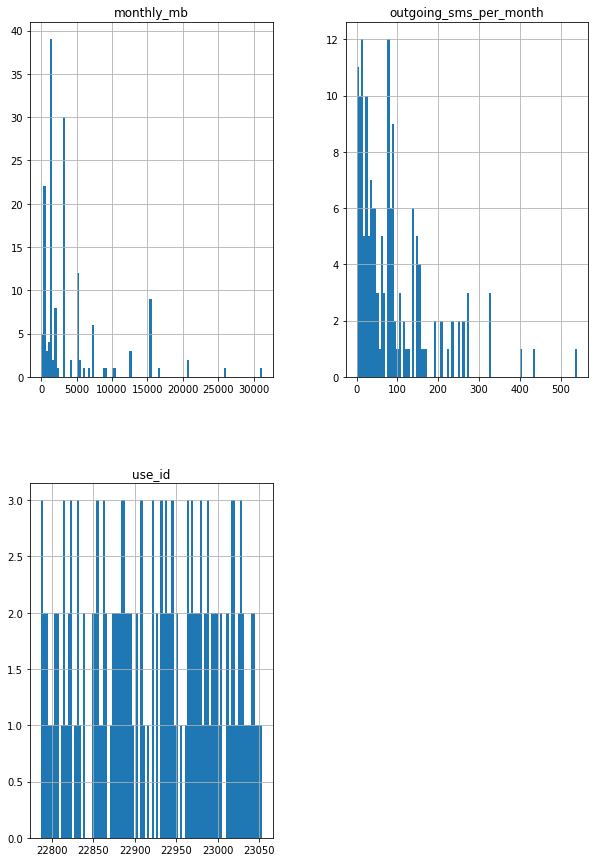

In [60]:
%matplotlib inline
results.hist(figsize=(10,15), bins=100)

In [49]:
user_usage['use_id'].isin(user_device['use_id']).value_counts()

True     159
False     81
Name: use_id, dtype: int64

In [56]:
#объединение
join_left = pd.merge(user_usage,
                 user_device[['use_id', 'device']],
                 on='use_id',
                 how='left')

devices.rename(columns={"Retail Branding": "manufacturer"}, inplace=True)
join_left = pd.merge(join_left, 
                  devices[['manufacturer', 'Model']],
                  left_on='device',
                  right_on='Model',
                  how='left')
join_left.head()

,outgoing_sms_per_month,monthly_mb,use_id,device,manufacturer,Model
0,4.82,1557.33,22787,GT-I9505,Samsung,GT-I9505
1,136.88,7267.55,22788,SM-G930F,Samsung,SM-G930F
2,136.88,7267.55,22789,SM-G930F,Samsung,SM-G930F
3,35.17,519.12,22790,D2303,Sony,D2303
4,79.26,1557.33,22792,SM-G361F,Samsung,SM-G361F


In [57]:
devices[devices.Model == 'SM-G903F']

,manufacturer,Marketing Name,Device,Model
10315,Samsung,Galaxy S5 Neo,s5neolte,SM-G903F


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163A031DD68>,
      dtype=object)

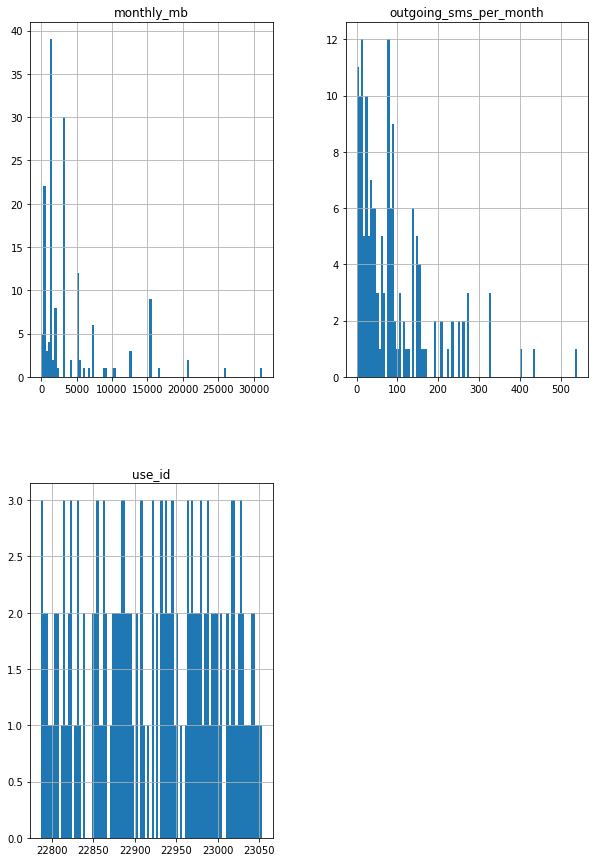

In [59]:
%matplotlib inline
join_left.hist(figsize=(10,15), bins=100)